**Imports**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

**Downloading dataset**

In [143]:
!gdown 1GV85WjuVM43gZE6RCjxXzzz0AiDm2Ani

Downloading...
From: https://drive.google.com/uc?id=1GV85WjuVM43gZE6RCjxXzzz0AiDm2Ani
To: /content/data2.txt
100% 2.35k/2.35k [00:00<00:00, 3.65MB/s]


**Reading dataset**

In [144]:
data = pd.read_csv("data2.txt", header = None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [145]:
data.shape

(118, 3)

**Plotting Data**

In [146]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

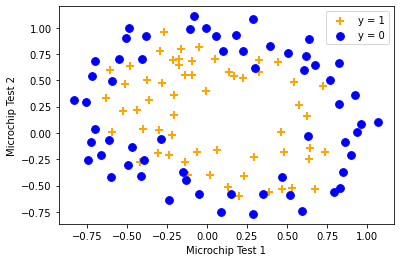

In [147]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [148]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values

**Add Polynomial Features**

In [149]:
def mapFeature( x1col, x2col):
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
      for j in range(0, i+1):
        term1 = x1col ** (i-j)
        term2 = x2col ** (j)
        term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
        out   = np.hstack(( out, term ))

    return out

In [150]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 28)


In [151]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

**Cost function and Gradient for the Regularized Logistic Regression**

In [152]:
#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [153]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [154]:
def computeGradientLogistic(X, y, w):
  m,n = X.shape
  
  value = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))                       
    err_i  = f_wb_i  - y[i]                       
    for j in range(n):
      value[j] = value[j] + err_i * X[i,j]        
  value = value/m                                  
      
  return value

In [155]:
import copy
import math
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)


def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  cost_list = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    value = computeGradientLogistic(myX, myy, w)   

    w = w*(1-alpha*(mylambda/m)) - alpha * value              
  
    if i<100000:
        cost_list.append( computeCost(w, myX, myy, mylambda) )

    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:3d}: Cost {cost_list[-1]}")
  return w, min(cost_list)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

(28,)
Iteration   0: Cost 0.6918760341510279
Iteration  10: Cost 0.6807787955201189
Iteration  20: Cost 0.6716993352797991
Iteration  30: Cost 0.6638378870820755
Iteration  40: Cost 0.6567772385512196
Iteration  50: Cost 0.6502906353642546
Iteration  60: Cost 0.64424707415317
Iteration  70: Cost 0.6385649242322786
Iteration  80: Cost 0.6331890771669233
Iteration  90: Cost 0.6280795068299218
(28,)
0.6236829483685058


In [156]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .1
    iters = 1000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration   0: Cost 0.6918760341510279
Iteration 100: Cost 0.6232053878935406
Iteration 200: Cost 0.5834834383882755
Iteration 300: Cost 0.5539189056091518
Iteration 400: Cost 0.5304711255387022
Iteration 500: Cost 0.5112963975143575
Iteration 600: Cost 0.49529478909214564
Iteration 700: Cost 0.48172861130876127
Iteration 800: Cost 0.47007596242258953
Iteration 900: Cost 0.45995566159518264
[ 1.30872757e+00  7.00256068e-01  1.36341875e+00 -2.16944099e+00
 -9.29244303e-01 -1.31282812e+00  1.01968141e-01 -3.89111695e-01
 -3.75585397e-01 -2.32188180e-01 -1.66226665e+00 -9.11030925e-02
 -6.55040195e-01 -2.71415698e-01 -1.33637719e+00 -3.14296960e-01
 -2.38903351e-01 -7.49418591e-02 -2.96234952e-01 -2.99615002e-01
 -6.60065875e-01 -1.22542494e+00 -1.78874272e-03 -3.23451687e-01
 -1.51509752e-03 -3.57119750e-01 -1.37232715e-01 -1.18325726e+00] 

Cost :  0.4511658724197426 
 
 
Iteration   0: Cost 0.6918765735084208
Iteration 100: Cost 0.6278884410558598
Iteration 200: Cost 0.5966082878917807

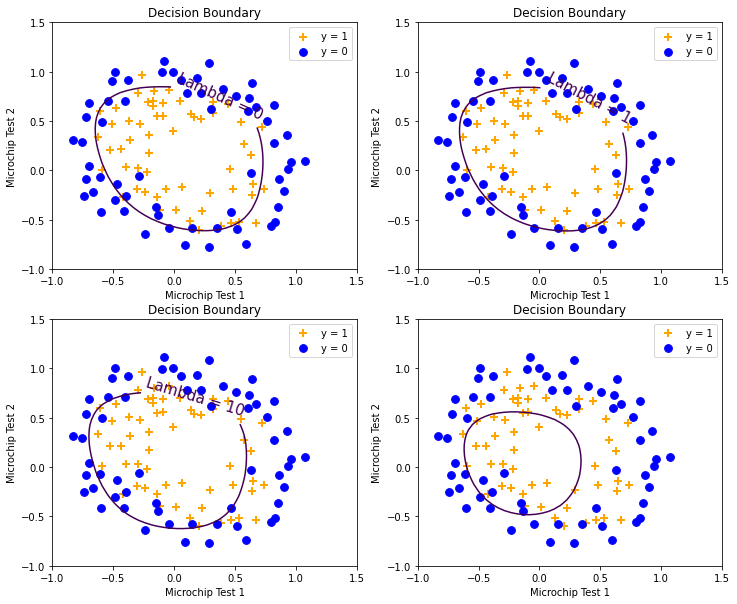

In [157]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)